In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Resturantdata.csv')
df.head()

,Names,Prices,Neighbourhoods,Number_of_reviews,Ratings,Type_of_resturant
0,Stadtklause,€,Kreuzberg,171,4.5,German
1,Schnitzelei Mitte,€€€,Mitte,51,4.5,Schnitzel
2,Momotaro Tavern,€€,Mitte,60,4.5,BurgersAsian Fusion
3,Aigner Gendarmenmarkt,€€€,Mitte,120,4.0,GermanAustrian
4,Ngon Restaurant Berlin,NaN,NaN,20,4.5,VietnamesePan AsianMitte


In [4]:
#Checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Names              240 non-null    object 
 1   Prices             202 non-null    object 
 2   Neighbourhoods     202 non-null    object 
 3   Number_of_reviews  240 non-null    int64  
 4   Ratings            240 non-null    float64
 5   Type_of_resturant  240 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 11.4+ KB


In [5]:
#Normalizing the ratings and number of reviews 

rating_min = df['Ratings'].min()
rating_max = df['Ratings'].max()
review_min = df['Number_of_reviews'].min()
review_max = df['Number_of_reviews'].max()

In [6]:
#Creating new coulmns for the normalized rating and reviews
df['Normalized_rating']=df['Ratings'].apply(lambda x: (x - rating_min)/(rating_max - rating_min) )
df['Normalized_reviews'] = df['Number_of_reviews'].apply(lambda x: (x - review_min)/(review_max - review_min) )

Text(0.5, 1.0, 'Hit location for resturant')

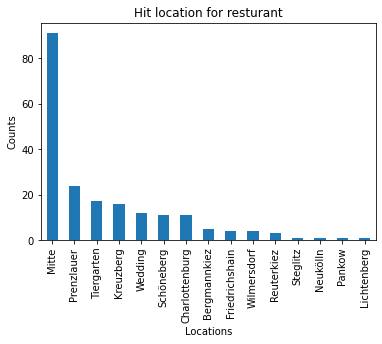

In [49]:
#Hit location for resturants 
df['Neighbourhoods'].value_counts().plot(kind = 'bar' )
plt.xlabel('Locations')
plt.ylabel('Counts')
plt.title('Hit location for resturant')

Text(0.5, 1.0, 'Percentage of location of the resturants')

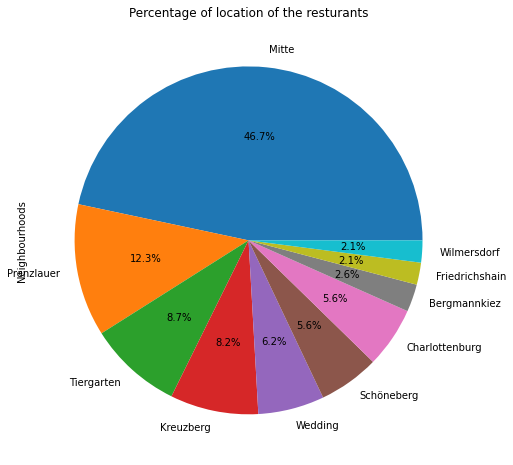

In [114]:
df['Neighbourhoods'].value_counts().nlargest(10).plot(kind = 'pie',figsize=(8,8), autopct = '%1.1f%%')
plt.title('Percentage of location of the resturants')

Text(0.5, 1.0, 'Count of rating based on Neighbourhoods')

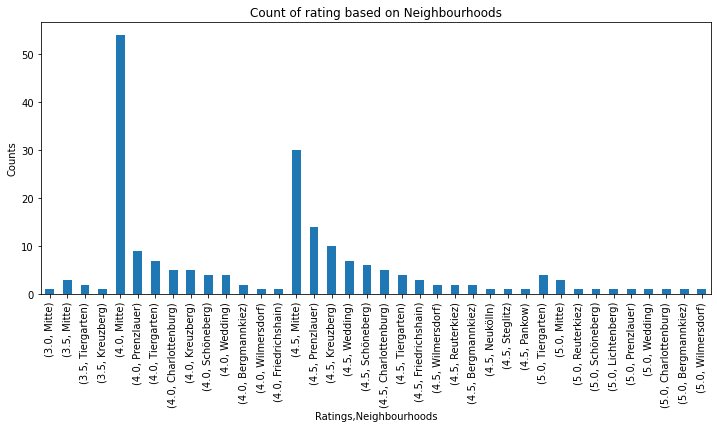

In [136]:
#checking locating rating
df[['Neighbourhoods','Ratings']].groupby('Ratings').value_counts().plot(kind='bar', figsize=(12,5))
plt.ylabel('Counts')
plt.title('Count of rating based on Neighbourhoods')

Text(0.5, 1.0, 'Count of reviews based on Neighbourhoods')

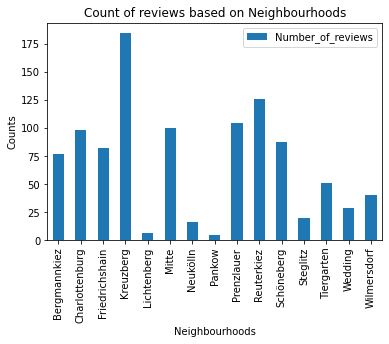

In [135]:
# Neighbourhoods
df[['Neighbourhoods','Number_of_reviews']].groupby(['Neighbourhoods']).mean().plot(kind='bar')
plt.ylabel('Counts')
plt.title('Count of reviews based on Neighbourhoods')

Text(0.5, 1.0, 'Most prefered price range')

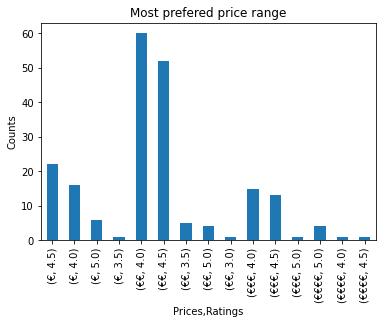

In [139]:
df[['Ratings','Prices']].groupby(['Prices']).value_counts().plot(kind='bar')
plt.ylabel('Counts')
plt.title('Most prefered price range')


Text(0.5, 1.0, 'Most popular type of restaurant')

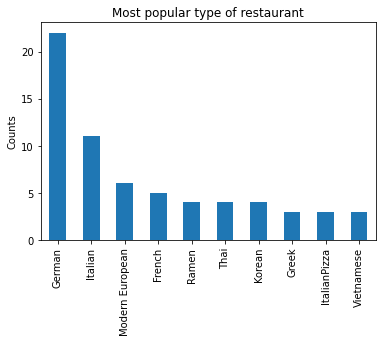

In [175]:
# df['Type_of_resturant'].value_counts().nlargest(15)

df1 = pd.read_csv('type_of_rest.csv')
df['Type_of_resturant'].value_counts().nlargest(10).plot(kind='bar')
plt.ylabel('Counts')
plt.title('Most popular type of restaurant')


In [190]:
new = df[df['Number_of_reviews']>280]
new = new.sort_values('Number_of_reviews',ascending=False)


<AxesSubplot:xlabel='Type_of_resturant'>

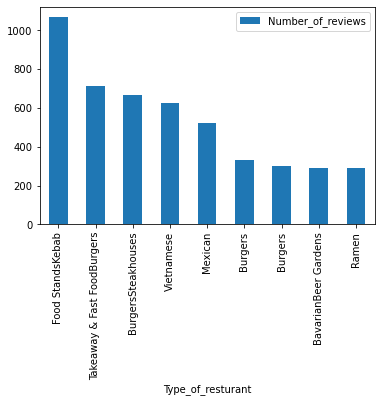

In [188]:
new.plot(x='Type_of_resturant',y='Number_of_reviews',kind='bar')


Text(0.5, 1.0, 'Most prefered type of restaurant by rating')

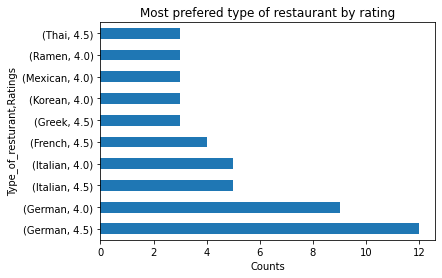

In [189]:
df[['Type_of_resturant','Ratings']].groupby('Type_of_resturant').value_counts().nlargest(10). plot(kind='barh')

plt.xlabel('Counts')
plt.title('Most prefered type of restaurant by rating')

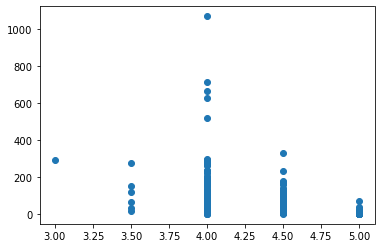

In [193]:
plt.scatter(df['Ratings'],df['Number_of_reviews'])

In [186]:
#Ways to sort a groupby 
# df[['Type_of_resturant','Number_of_reviews']].groupby('Type_of_resturant').value_counts().sort_index(level ='Number_of_reviews', sort_remaining=False,ascending=False).head(10)

In [112]:
# numcount= df[['Type_of_resturant','Number_of_reviews']].groupby('Type_of_resturant').value_counts().to_frame()